In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
print(df.shape)
df.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [2]:
# Summary statistics
summary_stats = df.describe()

# Missing value report
missing_values = df.isna().sum()
missing_percentage = (missing_values / len(df)) * 100

# Columns with more than 5% missing values
high_missing_cols = missing_percentage[missing_percentage > 5]

print(summary_stats)
print(missing_values)
print(high_missing_cols)

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571     206.643095   
std       298.495150     218.652659     158.946032     300.896893   
min       -19.500000      -7.800000     -17.900000       0.000000   
25%        -2.800000      -0.300000      -3.800000       0.000000   
50%         0.300000      -0.100000      -0.100000       3.600000   
75%       362.400000     107.000000     224.700000     359.500000   
max      1499.000000     946.000000     892.000000    1507.000000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.114691      26.319394      79.448857       1.146113   
std       288.889073       4.398605      20.520775       1.239248   
min         0.000000      12.300000       9.900000       0.000000   
25%         0.000000      23.1000

In [3]:
from scipy import stats
import pandas as pd
df = pd.read_csv('../data/sierraleone-bumbuna.csv')
print(df.head())
z_scores = stats.zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']])

# Identify outliers: Z-score > 3 or < -3
df['outlier'] = (abs(z_scores) > 3).any(axis=1)

# Check for missing values
missing_values = df.isna().sum()

# Display the outliers and missing values
print("Outliers detected:")
print(df[df['outlier']])

print("\nMissing values in each column:")
print(missing_values)
# Impute missing values in key columns with median
df['GHI'].fillna(df['GHI'].median(), inplace=True)
df['DNI'].fillna(df['DNI'].median(), inplace=True)
df['DHI'].fillna(df['DHI'].median(), inplace=True)

# Drop rows with any remaining missing values in critical columns
df.dropna(subset=['ModA', 'ModB', 'WS', 'WSgust'], inplace=True)

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
Outliers detected:
       

C:\Users\ruths\AppData\Local\Temp\ipykernel_24520\1469466054.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GHI'].fillna(df['GHI'].median(), inplace=True)
C:\Users\ruths\AppData\Local\Temp\ipykernel_24520\1469466054.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [4]:
df.to_csv('../data/sierraleone-bumbuna-cleaned.csv', index=False)

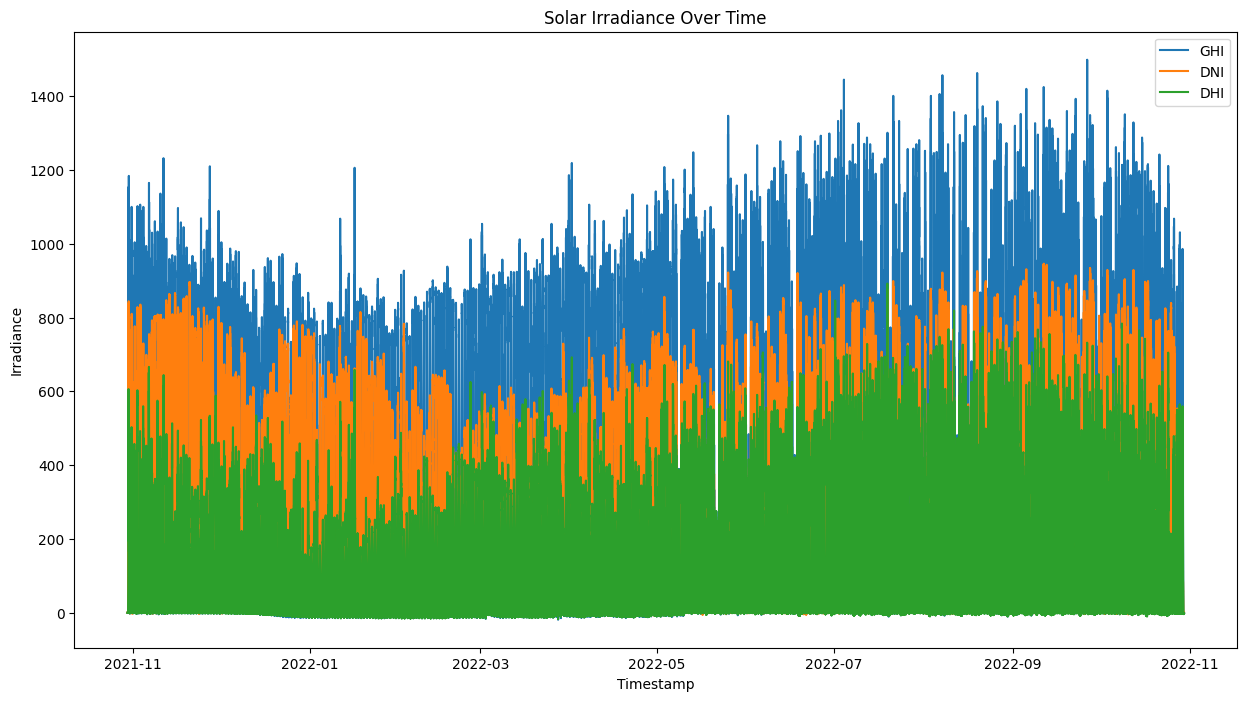

In [5]:
import matplotlib.pyplot as plt

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plotting
plt.figure(figsize=(15, 8))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.xlabel('Timestamp')
plt.ylabel('Irradiance')
plt.title('Solar Irradiance Over Time')
plt.legend()
plt.show()

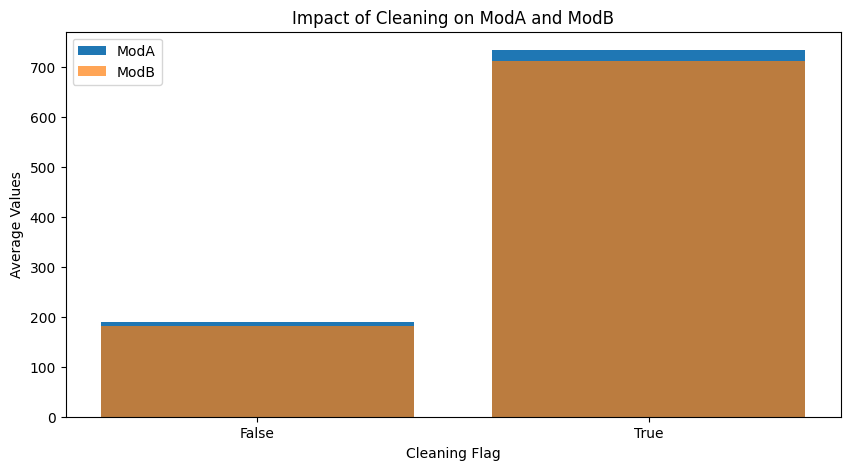

In [6]:
# Group by cleaning flag and calculate average ModA & ModB
cleaning_impact = df.groupby('outlier').agg({'ModA': 'mean', 'ModB': 'mean'}).reset_index()

# Plotting the impact of cleaning
plt.figure(figsize=(10, 5))
plt.bar(cleaning_impact['outlier'].astype(str), cleaning_impact['ModA'], label='ModA')
plt.bar(cleaning_impact['outlier'].astype(str), cleaning_impact['ModB'], label='ModB', alpha=0.7)
plt.xlabel('Cleaning Flag')
plt.ylabel('Average Values')
plt.title('Impact of Cleaning on ModA and ModB')
plt.legend()
plt.show()

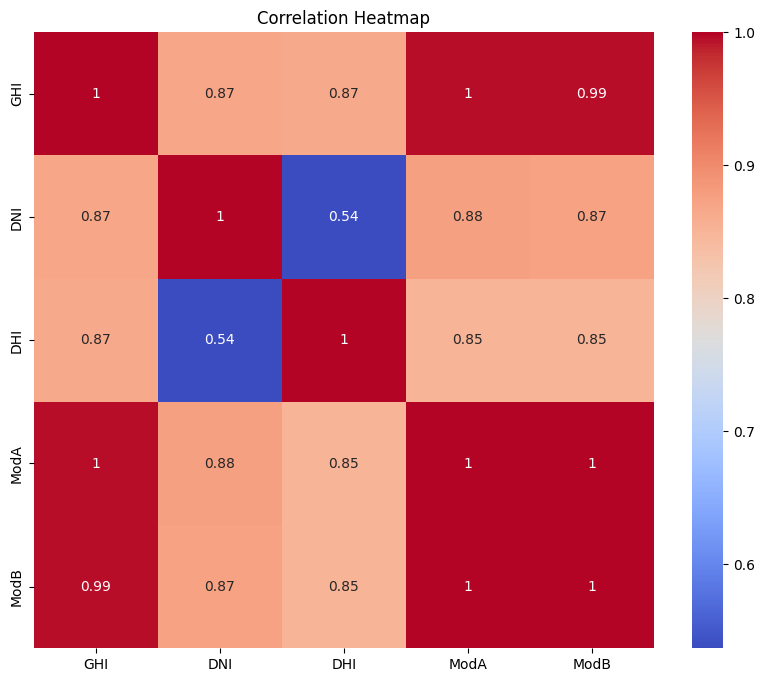

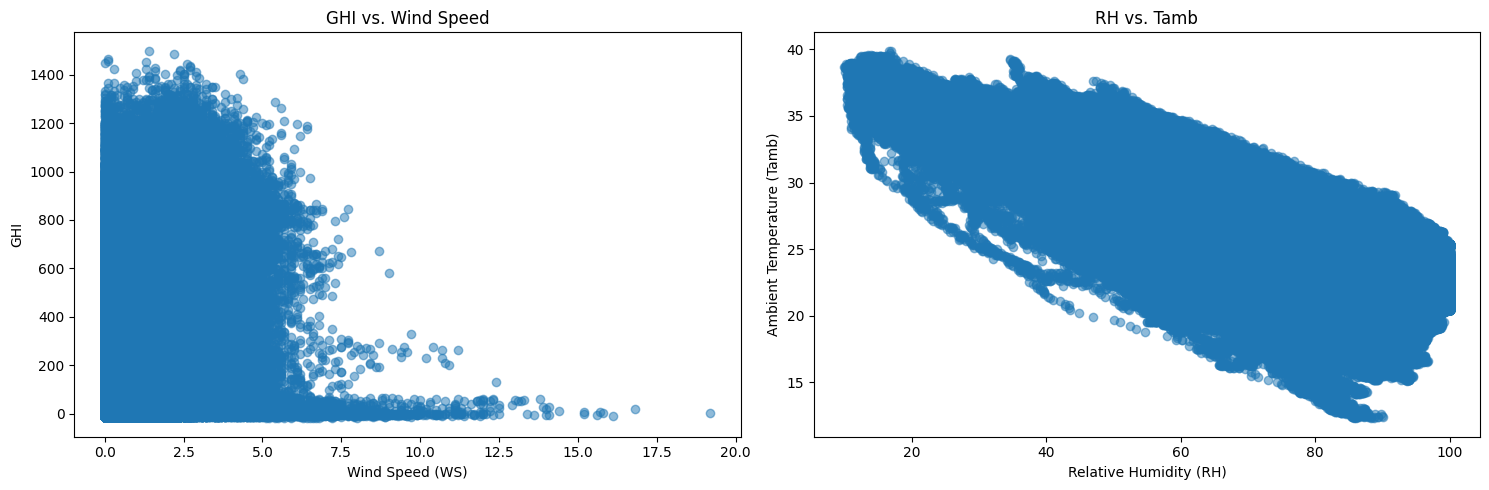

In [7]:
import seaborn as sns

# Heatmap of correlations
correlation_matrix = df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['WS'], df['GHI'], alpha=0.5)
plt.xlabel('Wind Speed (WS)')
plt.ylabel('GHI')
plt.title('GHI vs. Wind Speed')

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('RH vs. Tamb')

plt.tight_layout()
plt.show()

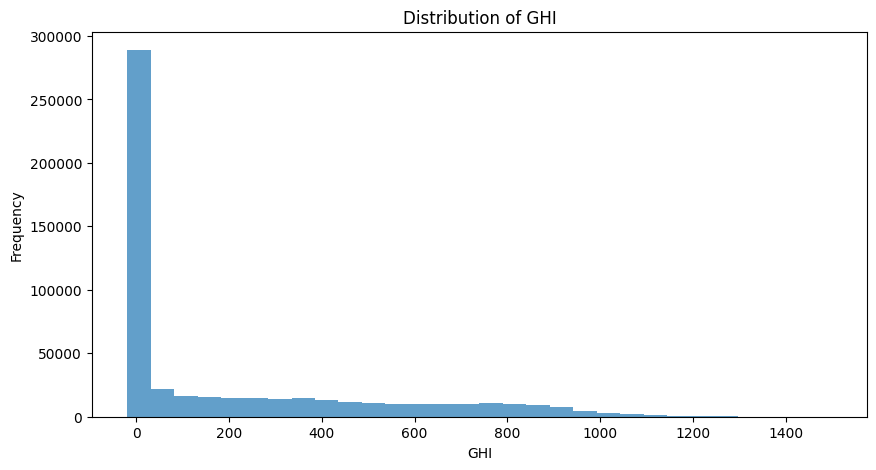

In [10]:
# Histogram for GHI
plt.figure(figsize=(10, 5))
plt.hist(df['GHI'], bins=30, alpha=0.7)
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Distribution of GHI')
plt.show()

# Wind rose plot (requires additional libraries like matplotlib)

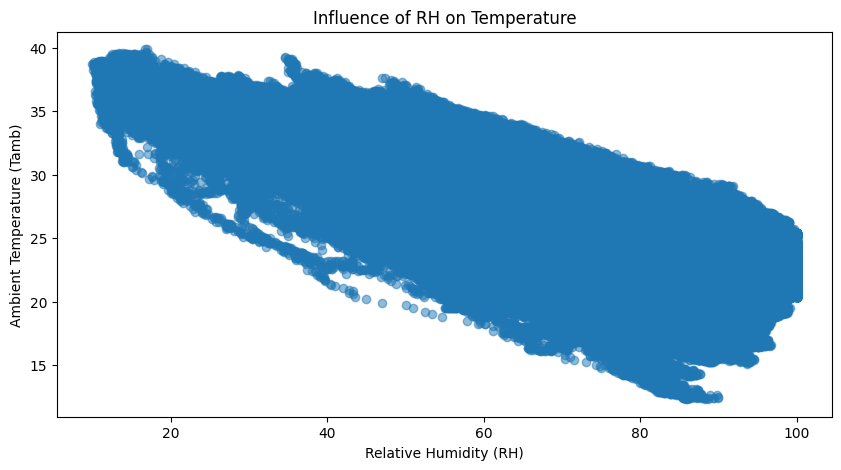

In [11]:
# Examine the influence of RH on temperature readings
plt.figure(figsize=(10, 5))
plt.scatter(df['RH'], df['Tamb'], alpha=0.5)
plt.xlabel('Relative Humidity (RH)')
plt.ylabel('Ambient Temperature (Tamb)')
plt.title('Influence of RH on Temperature')
plt.show()

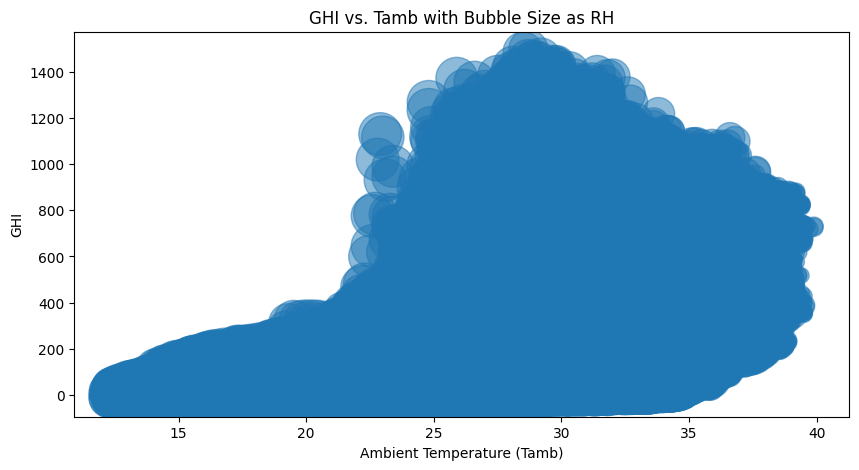

In [12]:
# GHI vs. Tamb with bubble size as RH
plt.figure(figsize=(10, 5))
plt.scatter(df['Tamb'], df['GHI'], s=df['RH']*10, alpha=0.5)
plt.xlabel('Ambient Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs. Tamb with Bubble Size as RH')
plt.show()